In [7]:
import pandas as pd
import numpy as np

In [8]:
df=pd.read_csv('sales-cars.csv')

In [9]:
df

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180
5,2016-06,169
6,2016-07,232
7,2016-08,225
8,2016-09,193
9,2016-10,123


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   36 non-null     object
 1   Sales   36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 704.0+ bytes


In [11]:
df.describe()

,Sales
count,36.00000
mean,295.75000
std,117.81908
min,119.00000
25%,192.50000
50%,280.00000
75%,402.75000
max,520.00000


In [12]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

https://www.ibm.com/docs/en/integration-bus/10.0?topic=function-formatting-parsing-datetimes-as-strings

https://github.com/moment/luxon/blob/master/docs/formatting.md

https://strftime.org/

In [13]:
from datetime import datetime

def convertToDatetime(stringdate):
    return datetime.strptime(stringdate, '%Y-%m')

In [14]:
df=pd.read_csv('sales-cars.csv', \
               parse_dates=[0], \
               date_parser=convertToDatetime, \
               index_col=0)

In [15]:
df.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


<AxesSubplot:xlabel='Month'>

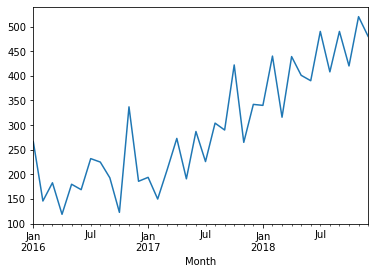

In [16]:
df.Sales.plot()

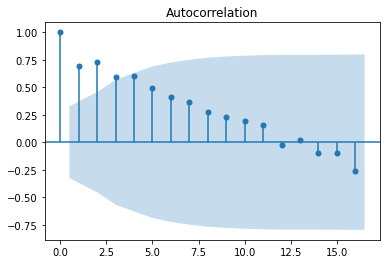

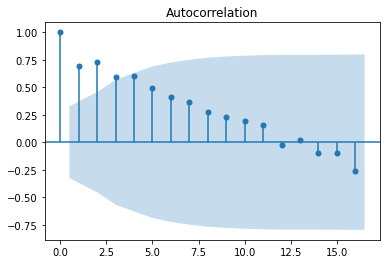

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)

In [18]:
df_diff=df.diff(periods=1)[1:]
df_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


<AxesSubplot:xlabel='Month'>

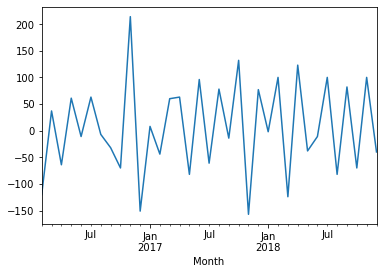

In [19]:
df_diff.Sales.plot()

In [20]:
train= df[:28]
test=df[28:]

In [21]:
from statsmodels.tsa.arima_model import ARIMA

order(p, d, q)

p -> AR

d -> integrated difference

q -> Moving Average

In [22]:
model = ARIMA(train, order=(1,1,1))

C:\Users\Shayeda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Shayeda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [23]:
 model_fit=model.fit()

In [24]:
pred = model_fit.forecast(steps=8)[0]

In [25]:
pred

array([371.45641318, 412.27527759, 406.1522689 , 420.36415875,
       425.76710956, 434.98603254, 442.55190246, 450.83386366])

In [26]:
model_fit.aic

306.858942618171

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test, pred)

2468.9553316599454

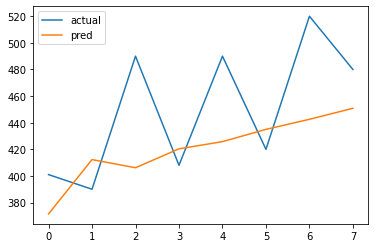

In [28]:
import matplotlib.pyplot as plt
plt.plot(range(8), test.Sales)
plt.plot(range(8), pred)
plt.legend(['actual', 'pred'])

# Finding the best value of p,d,q

In [29]:
import itertools

p = range(0,7)
d = range(0,7)
q = range(0,7)

pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 3, 6),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1,

In [32]:
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')

best_aic=100000

for pdq_combination in pdq:
    try:
        model_arima=ARIMA(train, order=pdq_combination)
        model_arima_fit=model_arima.fit()
        print('Got ', model_arima_fit.aic, ' at ', pdq_combination)
    except:
        print('Got error at ', pdq_combination)      

Got  335.08327681905075  at  (0, 0, 0)
Got  334.3688125845467  at  (0, 0, 1)
Got  329.3343588225346  at  (0, 0, 2)
Got  330.93461778305016  at  (0, 0, 3)
Got  399.6773937211916  at  (0, 0, 4)
Got  325.0123073106528  at  (0, 0, 5)
Got  nan  at  (0, 0, 6)
Got  324.39820432750815  at  (0, 1, 0)
Got  308.00821837537865  at  (0, 1, 1)
Got  306.8574915860821  at  (0, 1, 2)
Got  308.85219774084806  at  (0, 1, 3)
Got  309.9156877851511  at  (0, 1, 4)
Got  308.62527929199695  at  (0, 1, 5)
Got  310.1607090429013  at  (0, 1, 6)
Got  343.4127008785868  at  (0, 2, 0)
Got  318.2411242187953  at  (0, 2, 1)
Got  300.5577439481969  at  (0, 2, 2)
Got  303.1374765264144  at  (0, 2, 3)
Got error at  (0, 2, 4)
Got error at  (0, 2, 5)
Got  302.1376993551387  at  (0, 2, 6)
Got error at  (0, 3, 0)
Got error at  (0, 3, 1)
Got error at  (0, 3, 2)
Got error at  (0, 3, 3)
Got error at  (0, 3, 4)
Got error at  (0, 3, 5)
Got error at  (0, 3, 6)
Got error at  (0, 4, 0)
Got error at  (0, 4, 1)
Got error at  (0, 4, 2

Got error at  (6, 0, 5)
Got error at  (6, 0, 6)
Got  310.4912320914221  at  (6, 1, 0)
Got  312.2716176785738  at  (6, 1, 1)
Got  307.06006500879647  at  (6, 1, 2)
Got error at  (6, 1, 3)
Got error at  (6, 1, 4)
Got error at  (6, 1, 5)
Got error at  (6, 1, 6)
Got  305.5853525369418  at  (6, 2, 0)
Got error at  (6, 2, 1)
Got  301.26793824881645  at  (6, 2, 2)
Got  303.35213024319995  at  (6, 2, 3)
Got error at  (6, 2, 4)
Got error at  (6, 2, 5)
Got error at  (6, 2, 6)
Got error at  (6, 3, 0)
Got error at  (6, 3, 1)
Got error at  (6, 3, 2)
Got error at  (6, 3, 3)
Got error at  (6, 3, 4)
Got error at  (6, 3, 5)
Got error at  (6, 3, 6)
Got error at  (6, 4, 0)
Got error at  (6, 4, 1)
Got error at  (6, 4, 2)
Got error at  (6, 4, 3)
Got error at  (6, 4, 4)
Got error at  (6, 4, 5)
Got error at  (6, 4, 6)
Got error at  (6, 5, 0)
Got error at  (6, 5, 1)
Got error at  (6, 5, 2)
Got error at  (6, 5, 3)
Got error at  (6, 5, 4)
Got error at  (6, 5, 5)
Got error at  (6, 5, 6)
Got error at  (6, 6, 0)
G

In [34]:
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')

best_aic=100000

for pdq_combination in pdq:
    try:
        model_arima=ARIMA(train, order=pdq_combination)
        model_arima_fit=model_arima.fit()
        if model_arima_fit.aic < best_aic:
            best_aic=model_arima_fit.aic
            print('Got ', model_arima_fit.aic, ' at ', pdq_combination)
    except:
        continue

Got  335.08327681905075  at  (0, 0, 0)
Got  334.3688125845467  at  (0, 0, 1)
Got  329.3343588225346  at  (0, 0, 2)
Got  325.0123073106528  at  (0, 0, 5)
Got  324.39820432750815  at  (0, 1, 0)
Got  308.00821837537865  at  (0, 1, 1)
Got  306.8574915860821  at  (0, 1, 2)
Got  300.5577439481969  at  (0, 2, 2)
Got  299.6134808803049  at  (1, 2, 2)
Got  298.9622496176318  at  (3, 2, 3)
